# Personal Project
> Nama: **Agung Besti**

> Name Project: **Climate Change Earth Surface Temperature Data**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [4]:
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

climate-change-earth-surface-temperature-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
os.listdir('/content/gdrive/MyDrive/kaggle/')

['kaggle.json',
 'movie-genre-data.zip',
 'kaggle_movie_train.csv',
 'climate-change-earth-surface-temperature-data.zip',
 'GlobalLandTemperaturesByCity.csv',
 'GlobalLandTemperaturesByCountry.csv',
 'GlobalLandTemperaturesByMajorCity.csv',
 'GlobalLandTemperaturesByState.csv',
 'GlobalTemperatures.csv']

In [6]:
import zipfile
local_zip = '/content/gdrive/MyDrive/kaggle/climate-change-earth-surface-temperature-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
os.listdir('/content/gdrive/MyDrive/kaggle/')

['kaggle.json',
 'movie-genre-data.zip',
 'kaggle_movie_train.csv',
 'climate-change-earth-surface-temperature-data.zip',
 'GlobalLandTemperaturesByCity.csv',
 'GlobalLandTemperaturesByCountry.csv',
 'GlobalLandTemperaturesByMajorCity.csv',
 'GlobalLandTemperaturesByState.csv',
 'GlobalTemperatures.csv']

In [8]:
#library
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from keras.regularizers import l2
import time
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/content/gdrive/MyDrive/kaggle/GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


Melihat sebaran Negara pada dataset

In [10]:
values = df['Country'].value_counts().keys().tolist()
counts = df['Country'].value_counts().tolist()
dt = pd.DataFrame(list(zip(values, counts)), 
               columns =['Country', 'Count']) 
pd.set_option('display.max_rows', dt.shape[0]+1)
dt

,Country,Count
0,India,1014906
1,China,827802
2,United States,687289
3,Brazil,475580
4,Russia,461234
5,Japan,358669
6,Indonesia,323255
7,Germany,262359
8,United Kingdom,220252
9,Mexico,209560


Menghapus kolom yang tidak dibutuhkan

In [11]:
df.drop(['City','Latitude','Longitude'], axis=1, inplace=True)
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,6.068,1.737,Denmark
1,1743-12-01,NaN,NaN,Denmark
2,1744-01-01,NaN,NaN,Denmark
3,1744-02-01,NaN,NaN,Denmark
4,1744-03-01,NaN,NaN,Denmark
...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Netherlands
8599208,2013-06-01,15.043,0.261,Netherlands
8599209,2013-07-01,18.775,0.193,Netherlands
8599210,2013-08-01,18.025,0.298,Netherlands


Mengambil hanya data negara Australia

In [12]:
df = df.loc[df['Country'].isin(['Australia'])]
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
78638,1841-01-01,21.432,3.286,Australia
78639,1841-02-01,22.087,2.458,Australia
78640,1841-03-01,18.859,3.547,Australia
78641,1841-04-01,15.033,1.884,Australia
78642,1841-05-01,12.864,1.481,Australia
...,...,...,...,...
8243888,2013-05-01,16.947,0.154,Australia
8243889,2013-06-01,15.911,0.176,Australia
8243890,2013-07-01,15.518,0.178,Australia
8243891,2013-08-01,16.126,0.325,Australia


Mengambil data hanya dari tahun 1900 - 2013

In [13]:
df['dt'] = pd.to_datetime(df['dt'])  
get_data = (df['dt'] > '1900-01-01') & (df['dt'] <= '2013-09-01')
df.loc[get_data]

df = df.loc[get_data]
display(df)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
79347,1900-02-01,22.683,0.642,Australia
79348,1900-03-01,18.825,0.353,Australia
79349,1900-04-01,14.800,0.449,Australia
79350,1900-05-01,12.161,0.176,Australia
79351,1900-06-01,10.872,0.475,Australia
...,...,...,...,...
8243888,2013-05-01,16.947,0.154,Australia
8243889,2013-06-01,15.911,0.176,Australia
8243890,2013-07-01,15.518,0.178,Australia
8243891,2013-08-01,16.126,0.325,Australia


Mengecek data apakah ada nilai yang null / nan

In [14]:
df.isnull().sum()

dt                                0
AverageTemperature               14
AverageTemperatureUncertainty    14
Country                           0
dtype: int64

Drop baris yg memiliki nilai null / nan 

In [15]:
df.dropna(subset=['AverageTemperature'],inplace=True)
df.dropna(subset=['AverageTemperatureUncertainty'],inplace=True)
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

Plot Tiap Kolom

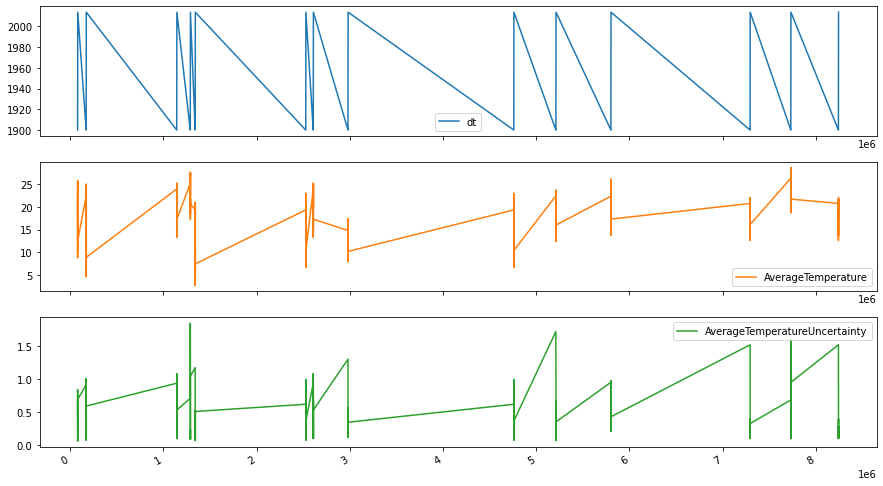

In [16]:
df_plot = df
df_plot[df_plot.columns.to_list()].plot(subplots=True, figsize=(15, 9))
plt.show()

Plot dates vs Average temperature

In [17]:
dates = df['dt'].values
temperatures = df['AverageTemperature'].values

Text(0.5, 0, 'Datetime')

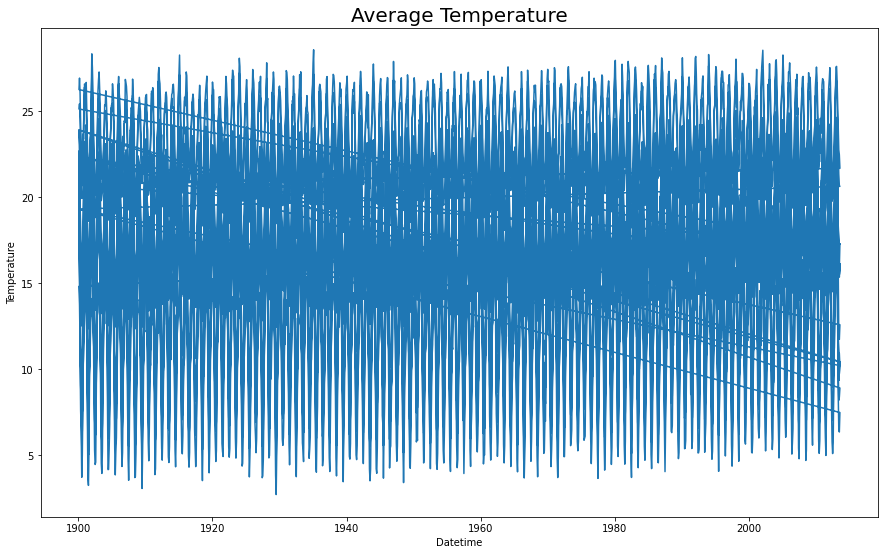

In [18]:
plt.figure(figsize=(15,9))
plt.plot(dates, temperatures)

plt.title('Average Temperature', fontsize = 20)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

Membagi dataset menjadi data **train 80%** dan **validation 20%**

In [19]:
x_train, x_valid, y_train, y_valid = train_test_split(temperatures, dates, test_size = 0.2, shuffle = False)

In [20]:
print('Total Data Train : ',len(x_train))
print('Total Data Validation : ',len(x_valid))

Total Data Train :  15265
Total Data Validation :  3817


Membuat function Transformasi data ke dalam model

In [21]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

Pemodelan Sequential dengan Bidrectional LSTM

In [22]:
tf.keras.backend.set_floatx('float64')

train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)

model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

Menghitung nilai 10% MAE untuk penerapan callback pada saat pelatihan

In [23]:
Mae = (df['AverageTemperature'].max() - df['AverageTemperature'].min()) * 10/100
print(Mae)

2.5855000000000015


In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<2.5 and logs.get('val_mae')<2.5):
      print("\nMAE dari model < 10% skala data")
      self.model.stop_training = True
callbacks = myCallback()

Penggunaan learning rate pada optimasi SGD

In [25]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set, epochs=100, validation_data = val_set, callbacks=[callbacks])

Epoch 1/100
77/77 [==============================] - 85s 1s/step - loss: 14.5006 - mae: 15.0006 - val_loss: 16.2273 - val_mae: 16.7273
Epoch 2/100
77/77 [==============================] - 88s 1s/step - loss: 9.6710 - mae: 10.1662 - val_loss: 6.9533 - val_mae: 7.4531
Epoch 3/100
77/77 [==============================] - 83s 1s/step - loss: 3.7998 - mae: 4.2742 - val_loss: 3.3534 - val_mae: 3.8249
Epoch 4/100
77/77 [==============================] - 80s 1s/step - loss: 3.5715 - mae: 4.0455 - val_loss: 3.2736 - val_mae: 3.7451
Epoch 5/100
77/77 [==============================] - 80s 1s/step - loss: 3.4228 - mae: 3.8952 - val_loss: 2.8074 - val_mae: 3.2788
Epoch 6/100
77/77 [==============================] - 80s 1s/step - loss: 3.2509 - mae: 3.7220 - val_loss: 2.5682 - val_mae: 3.0379
Epoch 7/100
77/77 [==============================] - 81s 1s/step - loss: 3.1253 - mae: 3.5952 - val_loss: 2.4072 - val_mae: 2.8741
Epoch 8/100
77/77 [==============================] - 81s 1s/step - loss: 2.917

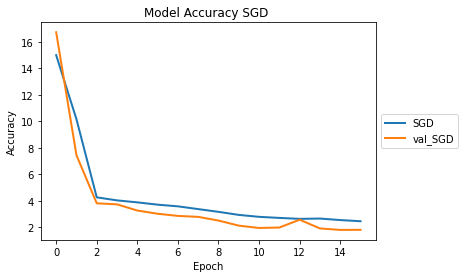

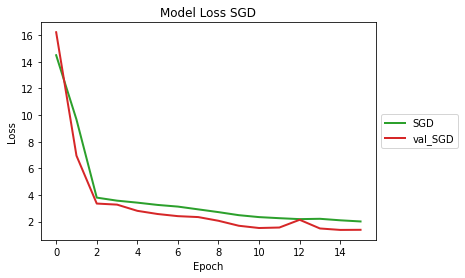

In [26]:
# visualisasi hasil data training
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']

# Visualisasi Accuracy Model
plt.plot(history.history['mae'], label='SGD', color=new_colors[0],linewidth=2)
plt.plot(history.history['val_mae'], label='val_SGD', color=new_colors[1],linewidth=2)
plt.title('Model Accuracy SGD ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
# Visualisasi Loss Model
plt.plot(history.history['loss'], label='SGD', color=new_colors[2],linewidth=2)
plt.plot(history.history['val_loss'], label='val_SGD', color=new_colors[3],linewidth=2)
plt.title('Model Loss SGD')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()